In [5]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('Scipy: {}'.format(scipy.version.version))
import numpy
print('Numpy: {}'.format(numpy.version.version))
import matplotlib
print('Matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('Pandas: {}'.format(pandas.__version__))
import sklearn
print('Sklearn: {}'.format(sklearn.__version__))


Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
Scipy: 1.2.1
Numpy: 1.16.2
Matplotlib: 3.0.3
Pandas: 0.24.2
Sklearn: 0.20.3


In [6]:
import pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier


In [7]:
#loading the data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length','sepal-width','petal-lenth','petal-width','class']
dataset = read_csv(url, names=names)

In [8]:
# dimensions of the dataset
print(dataset.shape)

(150, 5)


In [9]:
# take a peek at tha data
print(dataset.head(20))

    sepal-length  sepal-width  petal-lenth  petal-width        class
0            5.1          3.5          1.4          0.2  Iris-setosa
1            4.9          3.0          1.4          0.2  Iris-setosa
2            4.7          3.2          1.3          0.2  Iris-setosa
3            4.6          3.1          1.5          0.2  Iris-setosa
4            5.0          3.6          1.4          0.2  Iris-setosa
5            5.4          3.9          1.7          0.4  Iris-setosa
6            4.6          3.4          1.4          0.3  Iris-setosa
7            5.0          3.4          1.5          0.2  Iris-setosa
8            4.4          2.9          1.4          0.2  Iris-setosa
9            4.9          3.1          1.5          0.1  Iris-setosa
10           5.4          3.7          1.5          0.2  Iris-setosa
11           4.8          3.4          1.6          0.2  Iris-setosa
12           4.8          3.0          1.4          0.1  Iris-setosa
13           4.3          3.0     

In [10]:
# statistical summary
print(dataset.describe())

       sepal-length  sepal-width  petal-lenth  petal-width
count    150.000000   150.000000   150.000000   150.000000
mean       5.843333     3.054000     3.758667     1.198667
std        0.828066     0.433594     1.764420     0.763161
min        4.300000     2.000000     1.000000     0.100000
25%        5.100000     2.800000     1.600000     0.300000
50%        5.800000     3.000000     4.350000     1.300000
75%        6.400000     3.300000     5.100000     1.800000
max        7.900000     4.400000     6.900000     2.500000


In [11]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


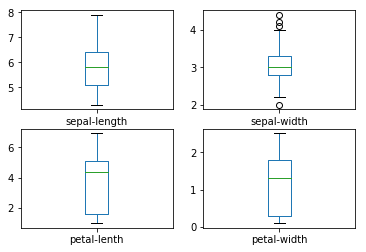

In [13]:
# univariate plots - box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2) ,sharex=False, sharey=False)
pyplot.show()

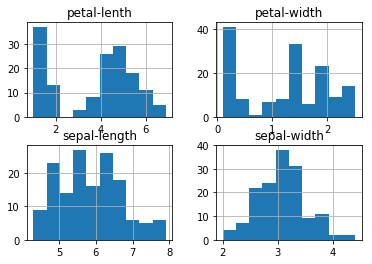

In [14]:
# histogram of the variable
dataset.hist()
pyplot.show()

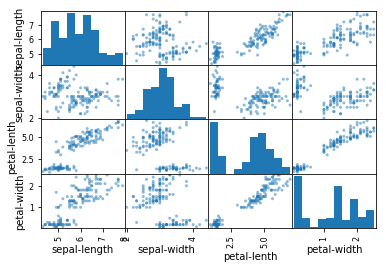

In [26]:
# multivariate plots
scatter_matrix(dataset)
pyplot.show()

In [27]:
# creating a validation dataset
# splitting dataset
array = dataset.values
X = array[:, 0:4]
y = array[:, 4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state =1)

In [28]:
# LogisticRegression
# Linear Discriminant Analysis
# K-Nearest neighbors
#Classification and Regression Trees
# Gaussian Naive Bayes
#Support Vector Machine

#building models
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [29]:
#evaluate the cfreated models
results = []
names = []
for name, model in models:
    kfold= StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name , cv_results.mean(), cv_results.std()))

LR: 0.960897 (0.052113)
LDA: 0.973974 (0.040110)
KNN: 0.957191 (0.043263)
NB: 0.948858 (0.056322)
SVM: 0.983974 (0.032083)


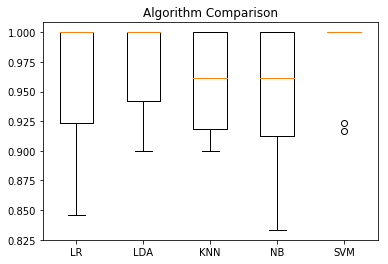

In [31]:
# compare our models
pyplot.boxplot(results,labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [32]:
# model predictions onm svm
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [33]:
# evaluate our predictions
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

